# **1. allplot**

### **패키지 불러오기**

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import cm
blue = cm.get_cmap('PuBu_r', 15)(range(14))
red = cm.get_cmap('PuRd_r', 15)(range(14))
green = cm.get_cmap('BuGn_r', 15)(range(14))
set = ['red','blue','forestgreen','gold','dimgray','blueviolet']
import glob
from tqdm import tqdm

### **함수 정의하기**

In [2]:
def font(small, medium, big):
    plt.rcParams['font.family'] = "Times New Roman"
    # 그래프 폰트 크기 지정
    plt.rc('axes', titlesize=big) # fontsize of the axes title
    plt.rc('axes', labelsize=big) # fontsize of the x and y labels
    plt.rc('xtick', labelsize=medium) # fontsize of the tick labels
    plt.rc('ytick', labelsize=medium) # fontsize of the tick labels
    plt.rc('legend', fontsize=small) # legend fontsize 

In [3]:
def theme():
    import matplotlib.ticker as ticker
    # 주 눈금 간격 설정
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.5))

    # 눈금 방향, 위치, 길이, 굵기 설정
    plt.tick_params(axis="x", which="major", direction="out", pad=8, length=6, width=2)
    plt.tick_params(axis="y", which="major", direction="out", pad=8, length=6, width=2)
    plt.tick_params(axis="y", which="minor", direction="out", pad=8, length=4, width=1)
    
    # 그래프 테두리 굵기 설정
    plt.gca().spines['left'].set_linewidth(2)
    plt.gca().spines['right'].set_linewidth(2)
    plt.gca().spines['top'].set_linewidth(2)
    plt.gca().spines['bottom'].set_linewidth(2)

In [4]:
def allplot(save_img, label, name, xlim, no, color):

    # csv 파일 list
    csv = [filename for filename in glob.glob('.\dat\test\*%s*.csv' % name, recursive=True)]

    # csv 파일 이름 - 소자이름 / HfO2 두께 / 반지름/ RTA 온도 / test number
    dv = [csv[i].split('\\')[-1][:-4].split(' ')[0] for i in range(len(csv))]
    thick = [csv[i].split('\\')[-1][:-4].split(' ')[1] for i in range(len(csv))]
    radius_str = [csv[i].split('\\')[-1][:-4].split(' ')[2] for i in range(len(csv))]
    radius_int = [int(radius_str[i]) for i in range(len(radius_str))]
    rta = [csv[i].split('\\')[-1][:-4].split(' ')[3] for i in range(len(csv))] 
    test = ["test " + csv[i].split('\\')[-1][:-5].split(' ')[4] for i in range(len(csv))] 

    # 비교하고자 하는 대상 정하기
    if label == "dv":
        legend = dv
    if label == "thick":
        legend = thick
    if label == "radius_str":
        legend = radius_str
    if label == "rta":
        legend = rta  
    if label == "test":
        legend = test  


    v, i_lin, i_abs, i_norm, i_nabs = [], [], [], [], []

    for i in range(len(csv)):
        filename = csv[i].split('\\')[-1][:-4]

        # 진행하고 있는 파일 명시하기
        tqdm(csv).set_description(f'Processing {filename}')  

        # 파일 읽기
        data = pd.read_csv(".\dat\test\%s" % filename + '.csv', names=['Value', 'Voltage', 'Current'])
        
        # 그래프 그리고자 하는 데이터 불러오기
        find_v = data.loc[data['Value'] == "DataValue"]["Voltage"]
        find_i = data.loc[data['Value'] == "DataValue"]["Current"]
        
        # voltage data
        v.append(list(map(float, find_v.values.tolist())))

        # current data
        I_lin = list(map(float, find_i.values.tolist()))
        i_lin.append(I_lin)

        # current 절댓값 data
        I_abs = list(map(abs, map(float, find_i.values.tolist())))
        i_abs.append(I_abs)

        # current 규격화 data
        I_norm = [I_lin[k] / (4 * math.pi * radius_int[i]**2) for k in range(len(I_lin))]
        i_norm.append(I_norm)

        # current 규격화 절댓값 data
        I_nabs = [abs(I_lin[k] / (4 * math.pi * radius_int[i]**2))  for k in range(len(I_lin))]
        i_nabs.append(I_nabs)
    

    ## 그래프 그리기 - linear scale   
    plt.figure(figsize=(9, 11))
    font(30, 32, 35)
    theme()
    for i in range(0, len(v)):
        if i in no:
            plt.plot(v[i], i_lin[i], ">-", color = color[i], alpha = 0.05)
        else:
            plt.plot(v[i], i_lin[i], ">-", color = color[i])
    plt.xlim(-xlim, xlim)
    plt.xlabel("Voltage [V]", labelpad=10)
    plt.ylabel("Current [A]", labelpad=10)
    plt.legend(legend)
    plt.grid()
    
    # 그림 파일 저장 여부
    if save_img == "T":
        plt.savefig('.\\res\\' + csv[0].split('\\')[-1][:-5] + '_%s.png' % 'linear', transparent=True, dpi=600, bbox_inches='tight')

    if save_img == "F":
        plt.show()


    ## 그래프 그리기 - log scale    
    plt.figure(figsize=(9, 11))
    font(30, 32, 35)
    theme()
    for i in range(0, len(v)):
        if i in no:
            plt.plot(v[i], i_abs[i], ">-", color = color[i], alpha = 0.05)
        else:
            plt.plot(v[i], i_abs[i], ">-", color = color[i])
    plt.yscale('log')
    plt.xlim(-xlim, xlim)
    plt.xlabel("Voltage [V]", labelpad=10)
    plt.ylabel("Current [A]", labelpad=10)
    plt.legend(legend)
    plt.grid()

    # 그림 파일 저장 여부
    if save_img == "T":
        plt.savefig('.\\res\\' + csv[0].split('\\')[-1][:-5] + '_%s.png' % 'log', transparent=True, dpi=600, bbox_inches='tight')

    if save_img == "F":
        plt.show()


    ## 그래프 그리기 - 규격화 linear 
    plt.figure(figsize=(9, 11))
    font(30, 32, 35)
    theme()
    for i in range(0, len(v)):
        if i in no:
            plt.plot(v[i], i_norm[i], ">-", color = color[i], alpha = 0.05)
        else:
            plt.plot(v[i], i_norm[i], ">-", color = color[i])
    plt.xlim(-xlim, xlim)
    plt.xlabel("Voltage [V]", labelpad=10)
    plt.ylabel("Current [A/$\mu$m$^2$]", labelpad=10)
    plt.legend(legend)
    plt.grid()

    # 그림 파일 저장 여부
    if save_img == "T":
        plt.savefig('.\\res\\' + csv[0].split('\\')[-1][:-5] + '_%s.png' % 'norm linear', transparent=True, dpi=600, bbox_inches='tight')

    if save_img == "F":
        plt.show()


    ## 그래프 그리기 - 규격화 log 
    plt.figure(figsize=(9, 11))
    font(30, 32, 35)
    theme()
    for i in range(0, len(v)):
        if i in no:
            plt.plot(v[i], i_nabs[i], ">-", color = color[i], alpha = 0.05)
        else:
            plt.plot(v[i], i_nabs[i], ">-", color = color[i])
    plt.yscale('log')
    plt.xlim(-xlim, xlim)
    plt.xlabel("Voltage [V]", labelpad=10)
    plt.ylabel("Current [A/$\mu$m$^2$]", labelpad=10)
    plt.legend(legend)
    plt.grid()

    # 그림 파일 저장 여부
    if save_img == "T":
        plt.savefig('.\\res\\' + csv[0].split('\\')[-1][:-5] + '_%s.png' % 'norm log', transparent=True, dpi=600, bbox_inches='tight')

    if save_img == "F":
        plt.show()

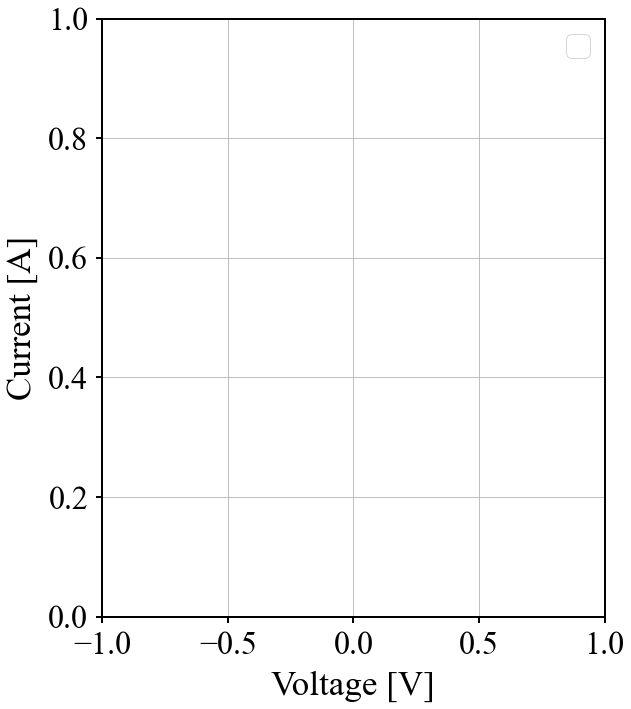

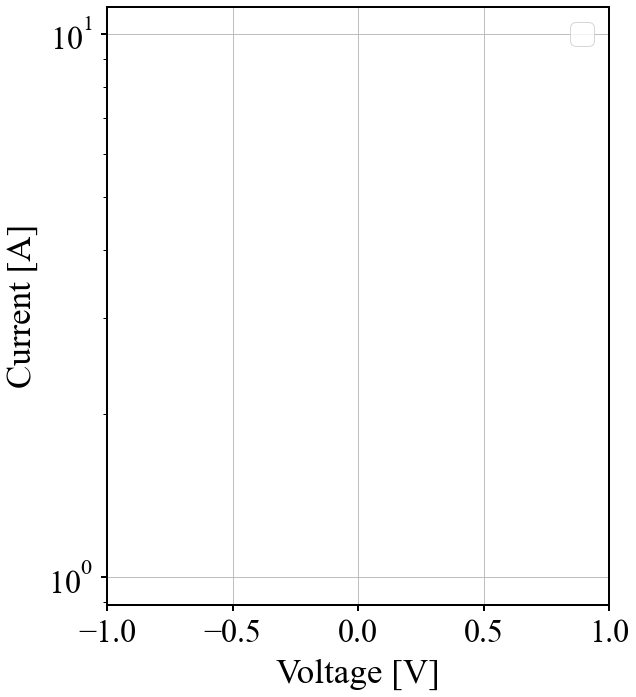

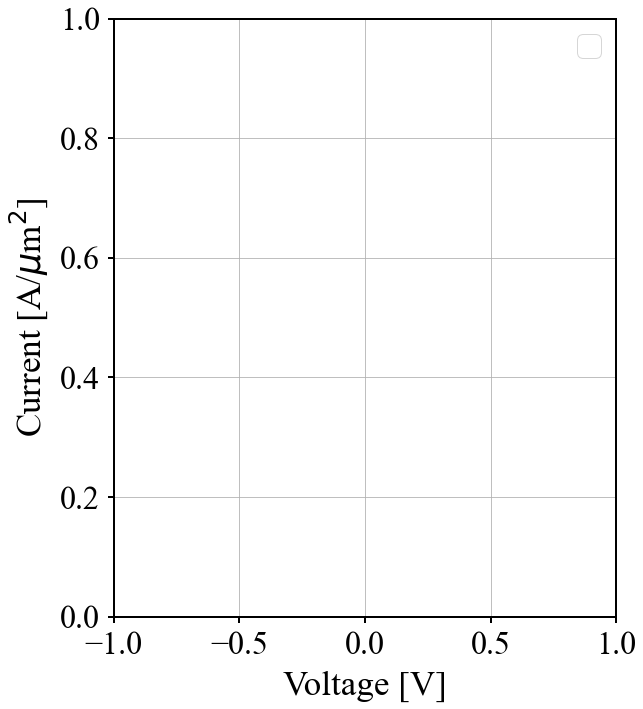

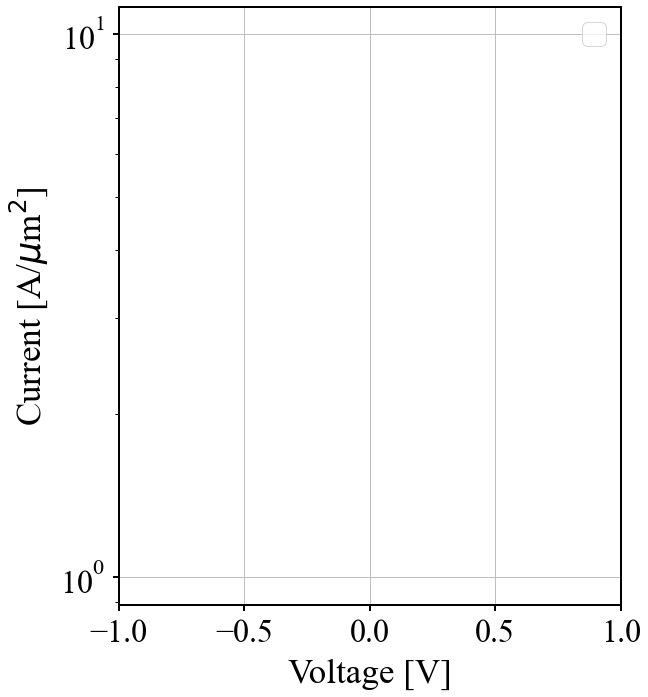

In [5]:
allplot("F", "test", '%s'%(' '), 1, [0], red)